# Car Price Prediction

In [193]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [194]:
car_dataset = pd.read_csv('./archive/train-data.csv')

In [195]:
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [196]:
car_dataset.shape

(6019, 14)

In [197]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [198]:
car_dataset.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [199]:
print("Shape of train data Before dropping any Row: ",car_dataset.shape)
car_dataset = car_dataset[car_dataset['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",car_dataset.shape)
car_dataset = car_dataset[car_dataset['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",car_dataset.shape)
car_dataset = car_dataset[car_dataset['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",car_dataset.shape)
car_dataset = car_dataset[car_dataset['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",car_dataset.shape)

Shape of train data Before dropping any Row:  (6019, 14)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 14)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 14)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 14)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 14)


In [200]:
car_dataset = car_dataset.reset_index(drop=True)

In [201]:
for i in range(car_dataset.shape[0]):
    car_dataset.at[i, 'Company'] = car_dataset['Name'][i].split()[0]
    car_dataset.at[i, 'Mileage(km/kg)'] = car_dataset['Mileage'][i].split()[0]
    car_dataset.at[i, 'Engine(CC)'] = car_dataset['Engine'][i].split()[0]
    car_dataset.at[i, 'Power(bhp)'] = car_dataset['Power'][i].split()[0]

In [202]:
car_dataset['Mileage(km/kg)'] = car_dataset['Mileage(km/kg)'].astype(float)
car_dataset['Engine(CC)'] = car_dataset['Engine(CC)'].astype(float)

In [203]:
x = 'n'
count = 0
position = []
for i in range(car_dataset.shape[0]):
    if car_dataset['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)

In [204]:
car_dataset = car_dataset.drop(car_dataset.index[position])
car_dataset = car_dataset.reset_index(drop=True)

In [205]:
car_dataset.shape

(5872, 18)

In [206]:
car_dataset['Power(bhp)'] = car_dataset['Power(bhp)'].astype(float)

In [207]:
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [208]:
for i in range(car_dataset.shape[0]):
    if pd.isnull(car_dataset.loc[i,'New_Price']) == False:
        car_dataset.at[i,'New_car_Price'] = car_dataset['New_Price'][i].split()[0]

In [209]:
car_dataset['New_car_Price'] = car_dataset['New_car_Price'].astype(float)

In [210]:
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80,NaN


In [211]:
car_dataset.drop(["Name"],axis=1,inplace=True)
car_dataset.drop(["Mileage"],axis=1,inplace=True)
car_dataset.drop(["Engine"],axis=1,inplace=True)
car_dataset.drop(["Power"],axis=1,inplace=True)
car_dataset.drop(["New_Price"],axis=1,inplace=True)

In [212]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5872 non-null   int64  
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Seats              5872 non-null   float64
 8   Price              5872 non-null   float64
 9   Company            5872 non-null   object 
 10  Mileage(km/kg)     5872 non-null   float64
 11  Engine(CC)         5872 non-null   float64
 12  Power(bhp)         5872 non-null   float64
 13  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 642.4+ KB


In [213]:
car_dataset.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


4 categorical features to check:

Location
Fuel_Type
Transmission
Owner_Type

In [214]:
var = 'Seats'
car_dataset[var].value_counts()

5.0     4919
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64

In [215]:
var = 'Location'
car_dataset[var].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

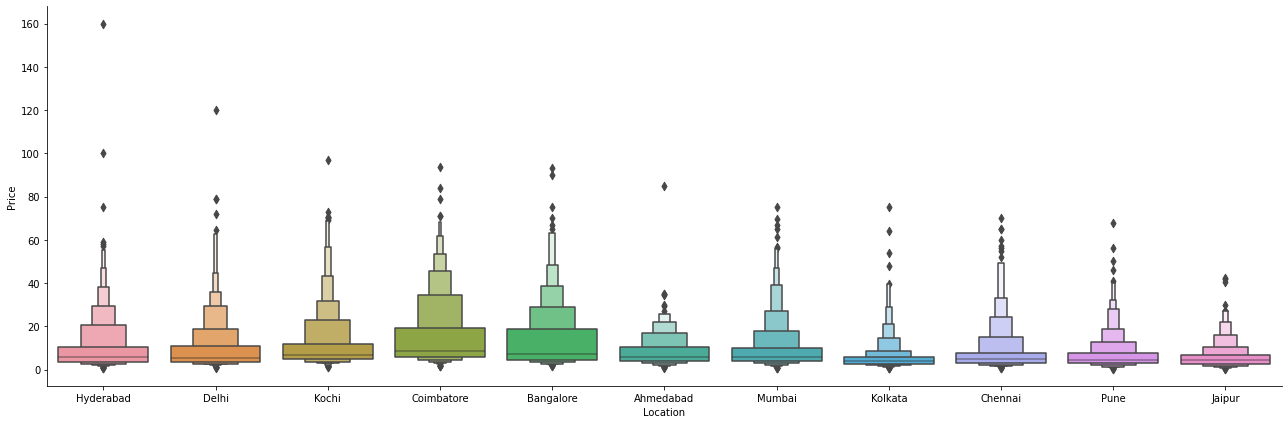

In [216]:
# Plot Location vs Price
sns.catplot(y='Price',x=var,data= car_dataset.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

One-hot-encoding here

In [217]:
Location = car_dataset[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [218]:
var = 'Fuel_Type'
car_dataset[var].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

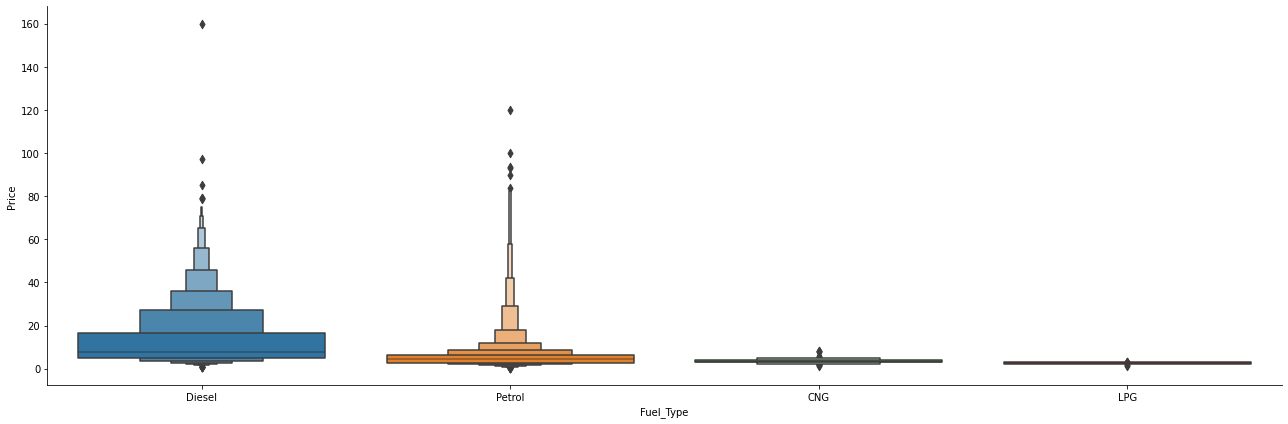

In [219]:
# Plot Fuel_Type vs Price
sns.catplot(y='Price',x=var,data= car_dataset.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

One-hot-encoding here

In [220]:
Fuel_t = car_dataset[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [221]:
var = 'Transmission'
car_dataset[var].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

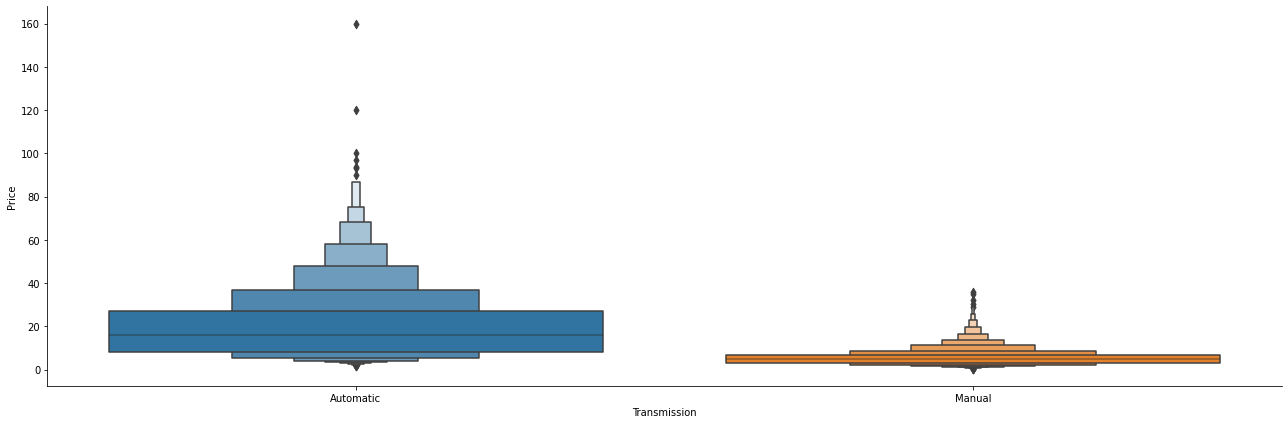

In [222]:
# Plot Transmission vs Price
sns.catplot(y='Price',x=var,data= car_dataset.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

One-hot-encoding here

In [223]:
Transmission = car_dataset[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [224]:
var = 'Owner_Type'
car_dataset[var].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

As Owner_Type column has ordered data so Label Encoding here

In [225]:
car_dataset.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
car_dataset.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [226]:
car_dataset.drop(["Company"],axis=1,inplace=True)

In [249]:
final_train= pd.concat([car_dataset,Location,Fuel_t,Transmission],axis=1)
final_train.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,...,0,0,0,0,1,0,0,0,0,1
1,1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,...,0,0,0,0,0,1,1,0,0,1
2,2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,...,0,0,0,0,0,0,0,0,1,1
3,3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,...,0,0,0,0,0,0,1,0,0,1
4,4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,...,0,0,0,0,0,0,1,0,0,0


In [250]:
final_train.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_train.head()

,Unnamed: 0,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,...,0,0,0,0,1,0,0,0,0,1
1,1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,...,0,0,0,0,0,1,1,0,0,1
2,2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,...,0,0,0,0,0,0,0,0,1,1
3,3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,...,0,0,0,0,0,0,1,0,0,1
4,4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,...,0,0,0,0,0,0,1,0,0,0


In [251]:
final_train.shape

(5872, 23)

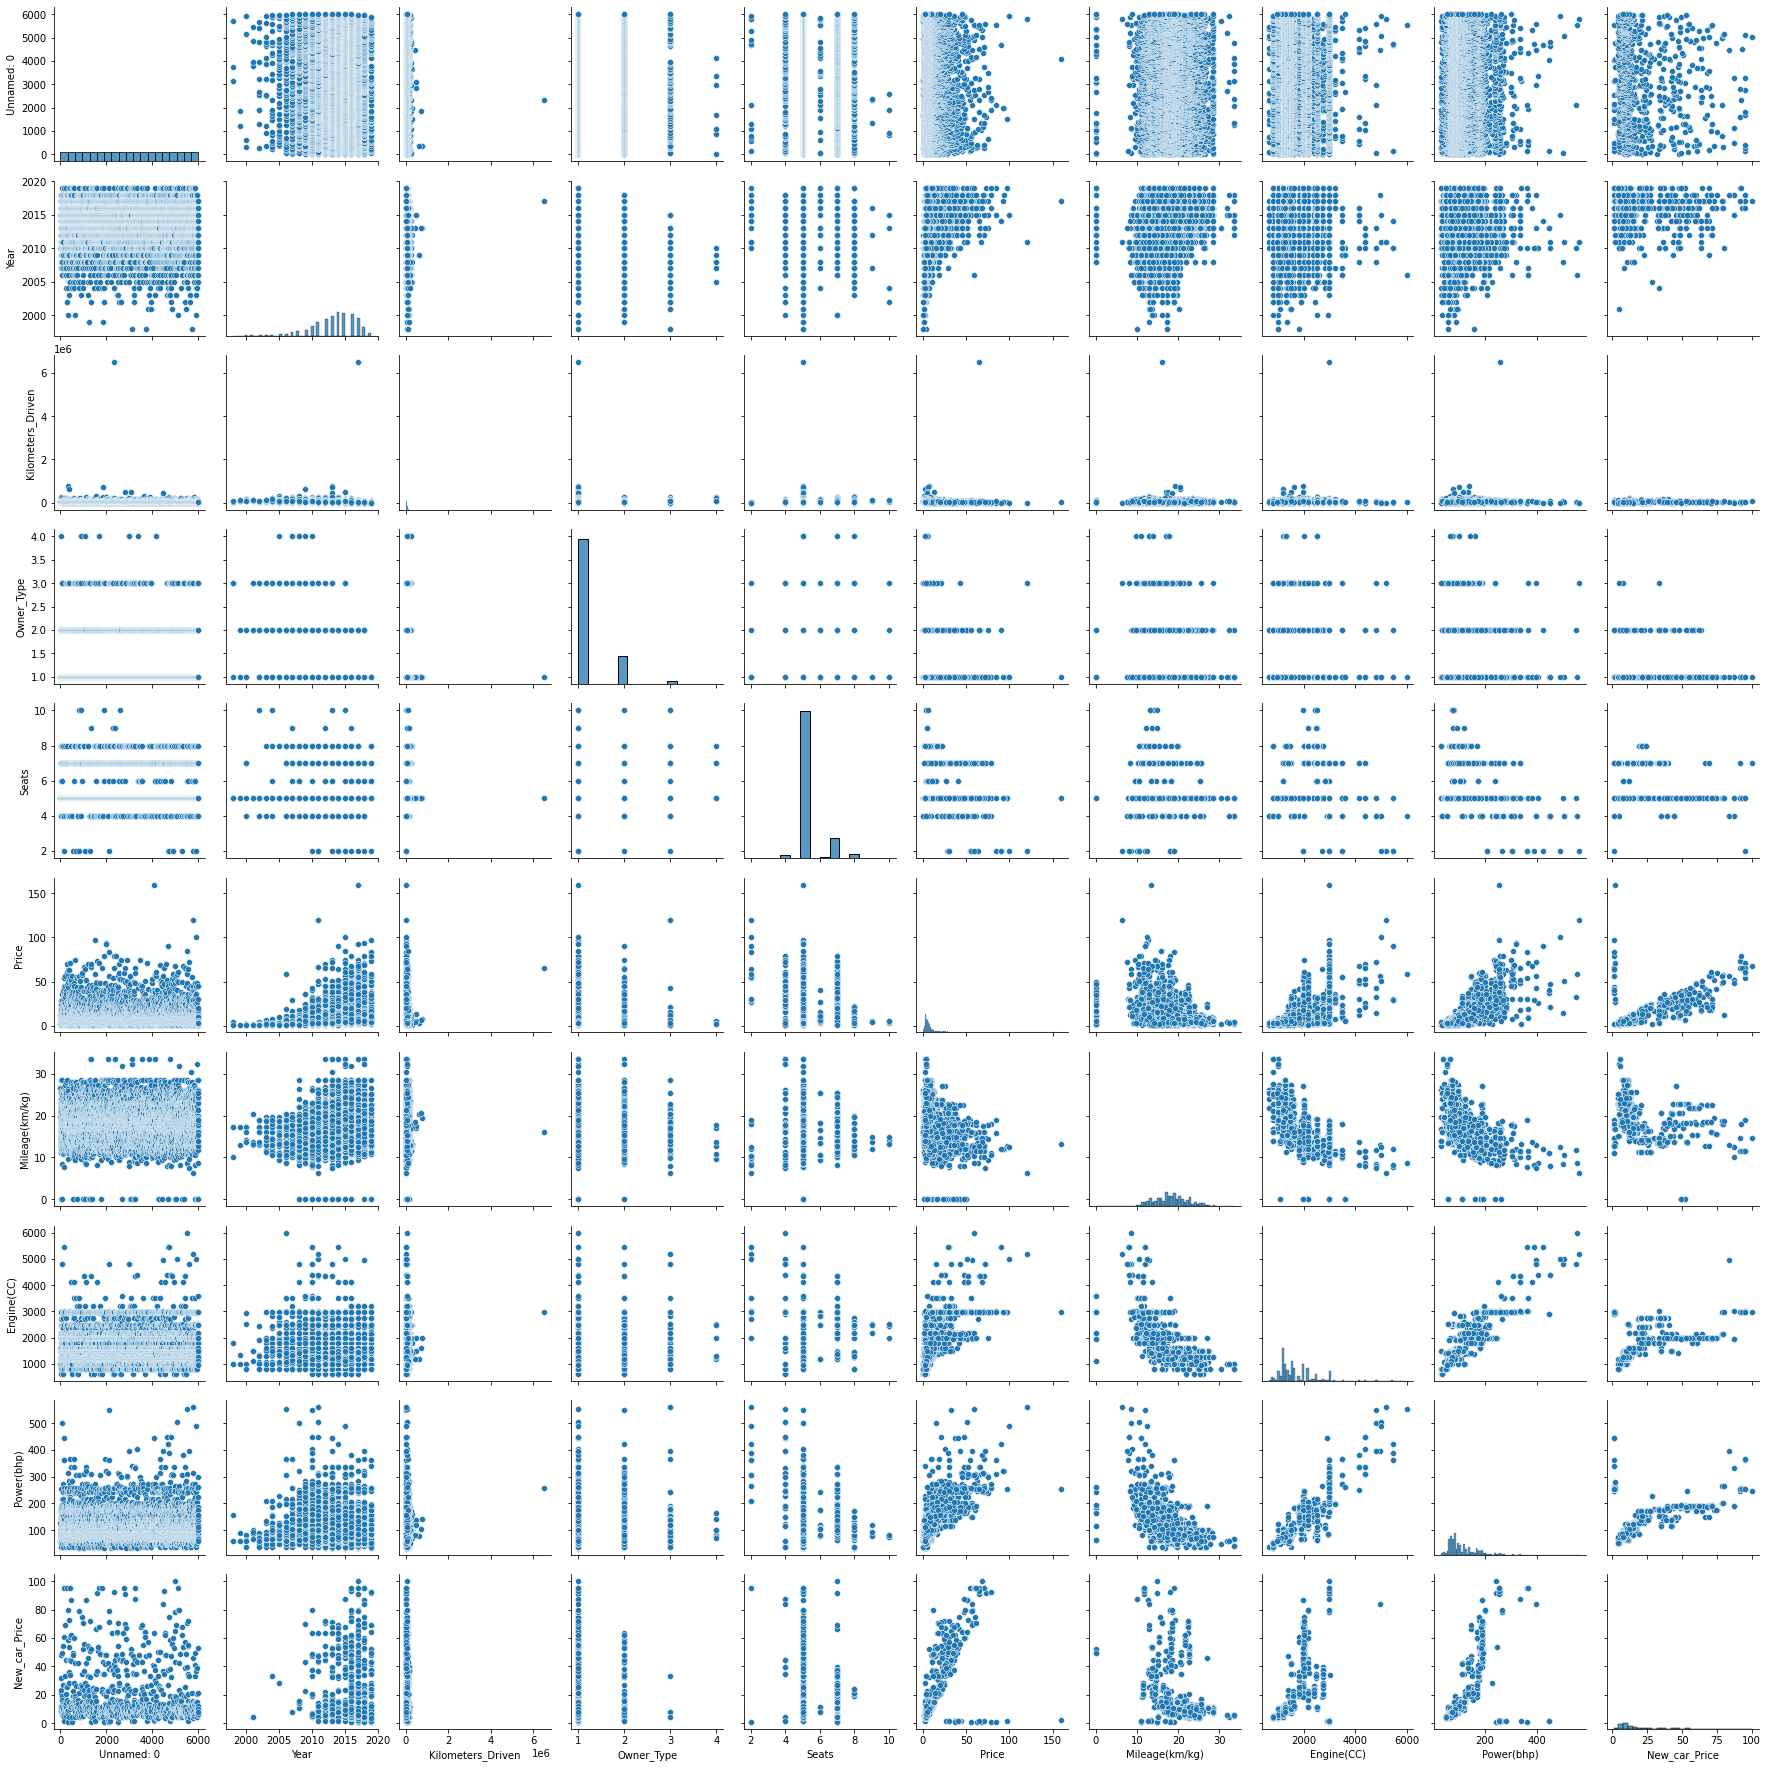

In [252]:
sns.pairplot(car_dataset)

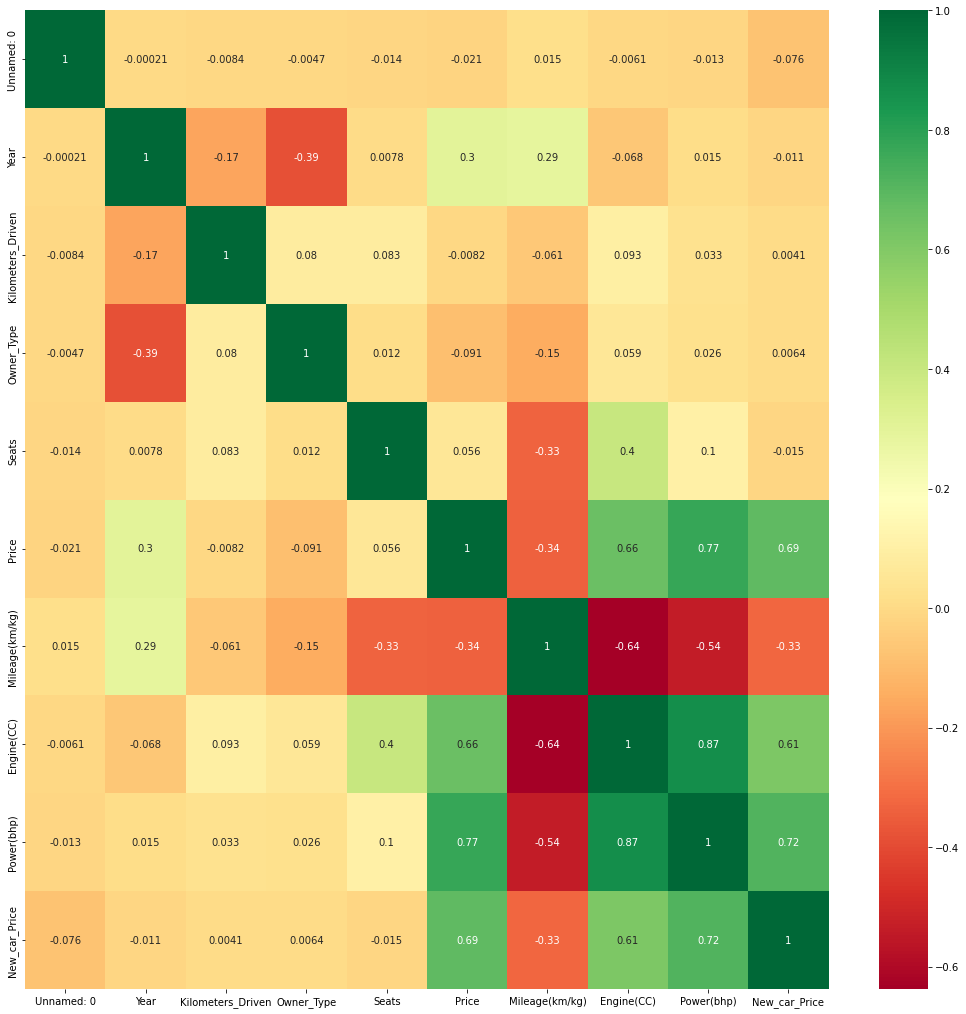

In [253]:
plt.figure(figsize=(18,18))
sns.heatmap(car_dataset.corr(),annot=True,cmap='RdYlGn')

plt.show()

# Final Features Selection

In [254]:
final_train.columns

Index(['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Price', 'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [255]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type','Seats','Mileage(km/kg)','Engine(CC)','Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


In [256]:
X.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,26.60,998.0,58.16,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,19.67,1582.0,126.20,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,18.20,1199.0,88.70,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,20.77,1248.0,88.76,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,15.20,1968.0,140.80,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [257]:
X.shape

(5872, 21)

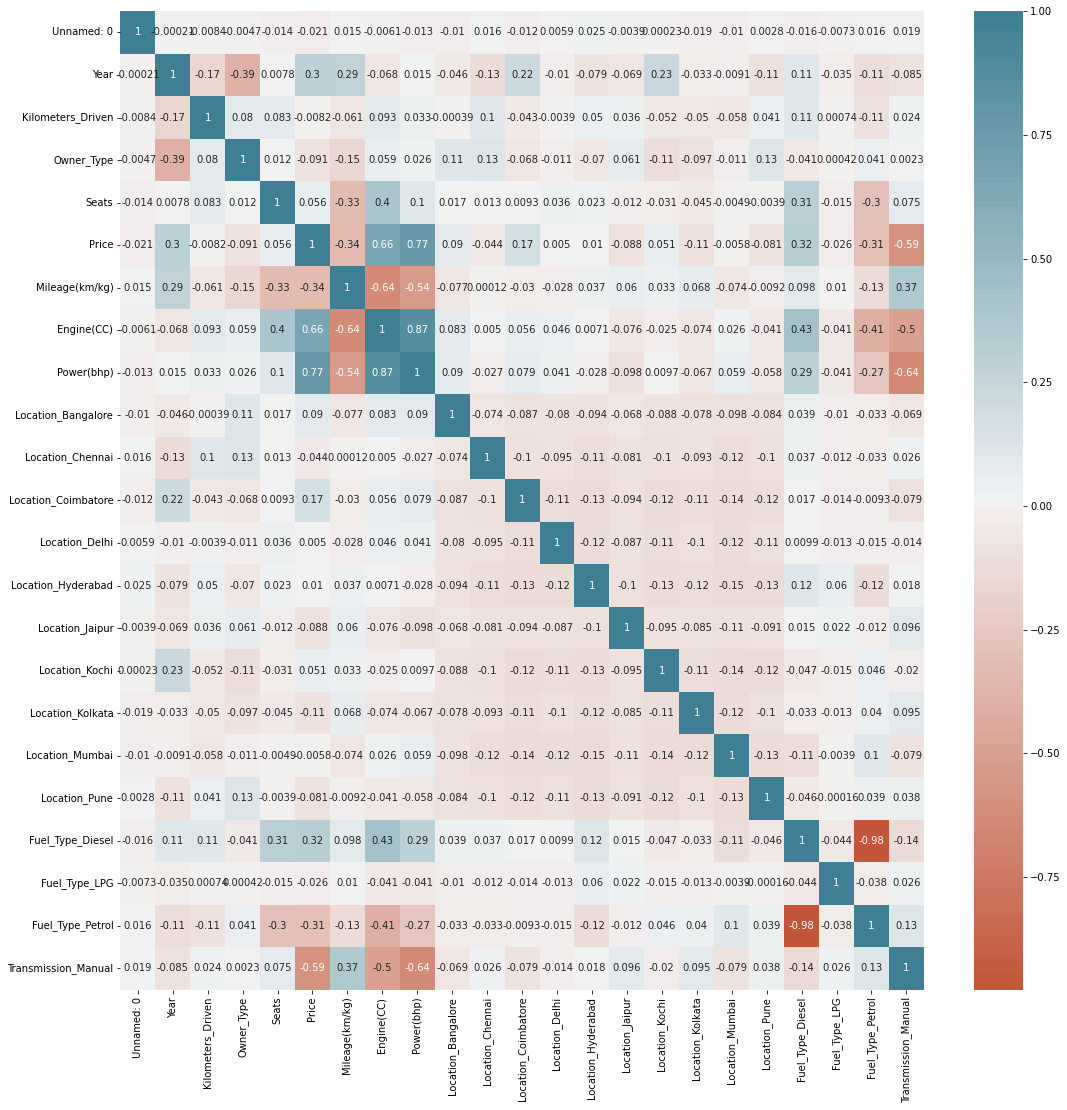

In [258]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [259]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

/var/folders/jq/7j50kp6j4g3_5ypz5359z9cr0000gn/T/ipykernel_12908/1302846868.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

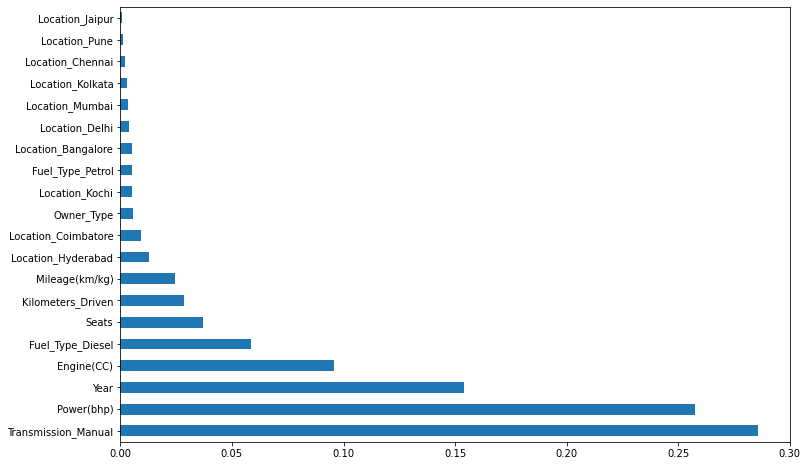

In [260]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [262]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7005621804529992
Accuracy on Testing set:  0.7256102038308836


In [263]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred= dt_reg.predict(X_test)
print("Accuracy on Traing set: ",dt_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",dt_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9999957727341057
Accuracy on Testing set:  0.83075389002561


In [264]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

/var/folders/jq/7j50kp6j4g3_5ypz5359z9cr0000gn/T/ipykernel_12908/1618603712.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Accuracy on Traing set:  0.9820475348555948
Accuracy on Testing set:  0.9106433763624514


In [265]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_depth=20), X,y,cv=cv)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

array([0.91576411, 0.90297975, 0.90090799, 0.8707727 , 0.89790138])

In [266]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in 

array([0.85390693, 0.86213437, 0.84959856, 0.71326544, 0.83333883])

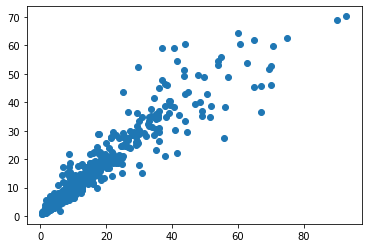

In [267]:
predictions=rf_reg.predict(X_test)
plt.scatter(y_test,predictions)

In [268]:
import pickle
with open('RF_price_predicting_model.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(rf_reg, file)